In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
strrev = lambda y: str(''.join([_ for _ in reversed(y)]))
def get_label(dct):
    if float(dct['α']) == 0:
        return '1_OLS'
    elif float(dct['l1r']) == 1:
        return f'2_L1, α={dct["α"]}'
    elif float(dct['l1r']) == 0:
        return f'3_L2, α={dct["α"]}'
    else:
        return f'4_l1r={dct["l1r"]}, α={dct["α"]}'
    return

In [40]:
# file_loc = r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_outputs_rev\Figure_3-mse_sctr.csv'

# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv'
# file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds/Figure_1_2-mse_sctr.csv'

# file_loc_lst = [
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv',
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps-wds/Figure_1_2-mse_sctr.csv'
# ]
file_loc_lst = [
    r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old/run_20230404--20_20sft/Figure_7_g1--20_20sft-mse_sctr.csv',
#     r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs-old/final_outputs-old-wds/Figure_1_2-mse_sctr.csv'
]

for file_loc in file_loc_lst:
    concat = pd.read_csv(file_loc)
    
#     run_name = concat.loc[0, 'name']
    
    concat['model_version'] = concat['model_version'].str.replace('max_iter10000__fit_interceptFalse__',  '')
    concat['model_version'] = concat['model_version'].str.replace('____',  '.')
    concat['model_version'] = concat['model_version'].str.replace('alpha','α=')
    concat['model_version'] = concat['model_version'].str.replace('l1_ratio','l1r=')
    concat['model_version'] = concat['model_version'].str.replace('base_','')
    concat['model_version'] = concat['model_version'].str.replace('simple_','')
    concat['model_version'] = concat['model_version'].str.replace('words_','')
    concat['model_version'] = concat['model_version'].apply(lambda x: ([{_.split('=')[0]: strrev(strrev(_.split('=')[1]).zfill(4))} for _ in x.split('__')]))#.str.zfill(4)
    concat['model_version'] = concat['model_version'].apply(lambda x: {k: v for d in x for k, v in d.items()})#.str.zfill(4)

    concat['label'] = concat['model_version'].apply(lambda x: get_label(x))
    concat = concat.drop('model_version', axis=1)

    # concat = concat.set_index(['channel', 'name', 'model_version', 'run_num']).drop('mouse_id', axis=1)
    concat = concat.set_index(['channel', 'name', 'label', 'run_num']).drop('mouse_id', axis=1)

    # vbp['model_version'].apply(lambda x: [[_.split('=')[0], strrev(strrev(_.split('=')[1]).zfill(4))] for _ in x.split('__')])#.str.zfill(4)
    

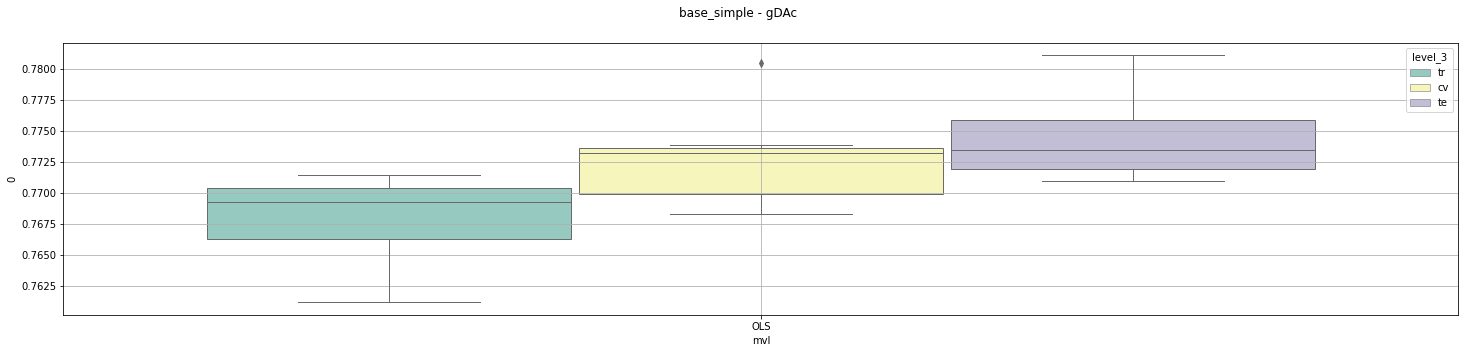

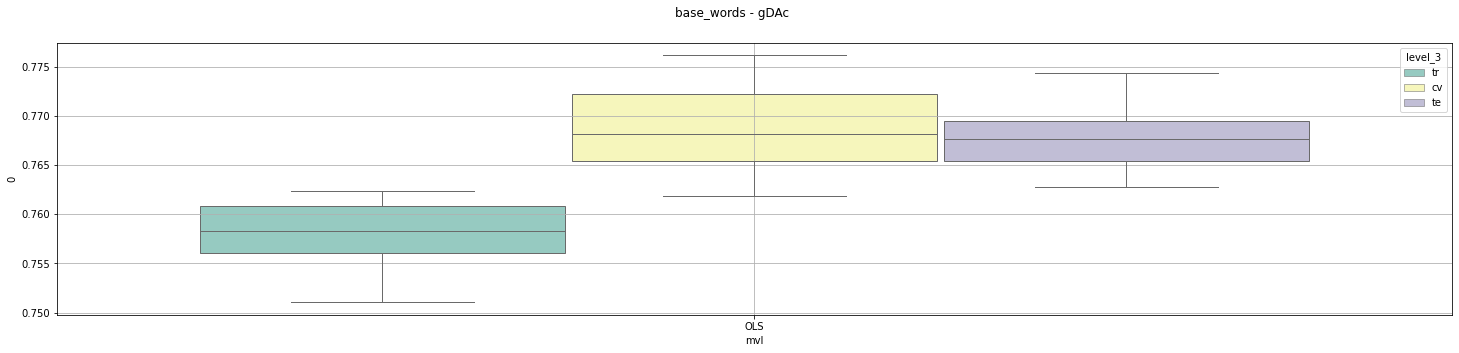

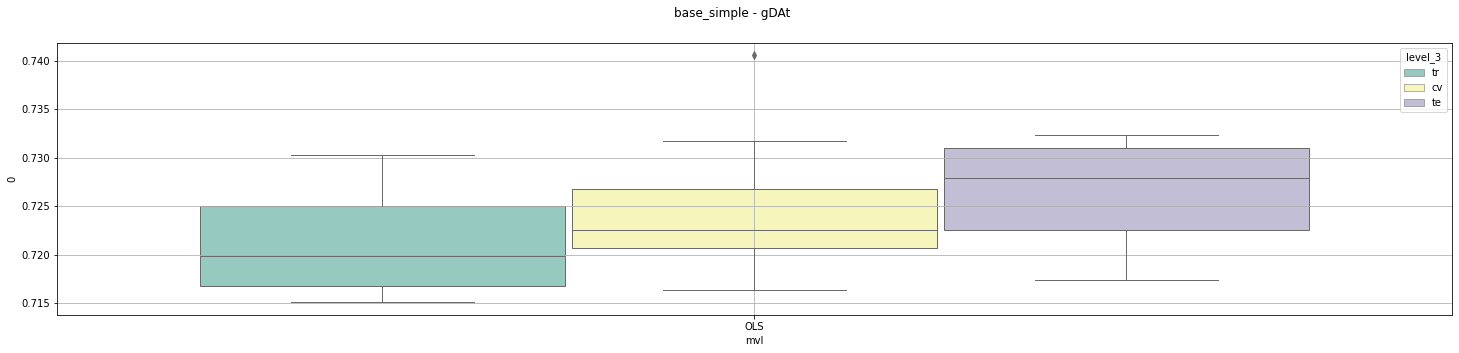

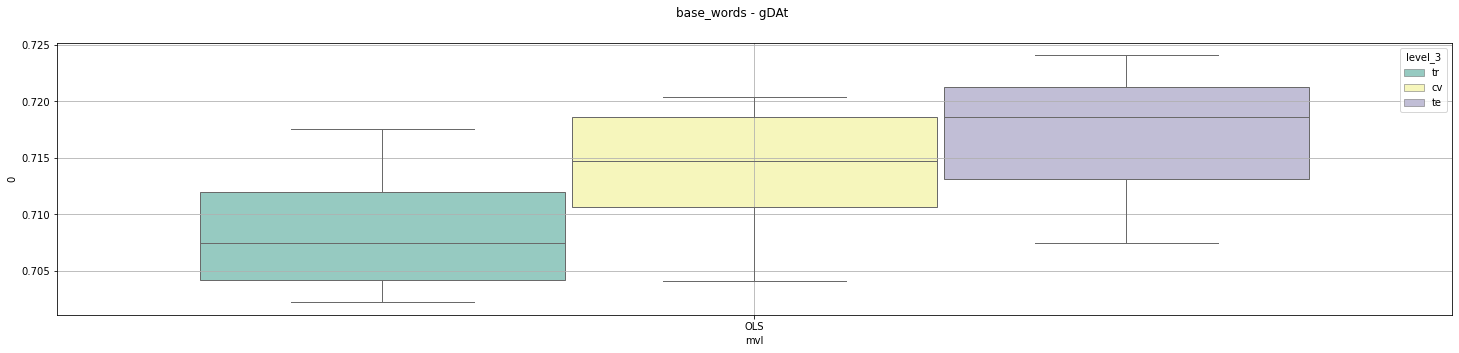

In [41]:
    # OUTPUT OPTION #1 - Separate plots for each name / channel

    for chl in concat.reset_index()['channel'].unique():
        chl_concat = concat.query(f"channel == '{chl}'")
        for nm in chl_concat.reset_index()['name'].unique():
            chl_nm_concat = chl_concat.query(f"name == '{nm}'")

            fig, ax = plt.subplots(1,1,figsize=(25,5))

            fig.suptitle(f'{nm} - {chl}')
            fig.set_facecolor('w')

            vwyc = chl_nm_concat.loc[chl].values
            ymn, ymx = np.min(vwyc), np.max(vwyc)

            vbp = chl_nm_concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
            vbp['mvl'] = vbp['label']
        #     vbp['mvl'] = vbp['label'] + ' / ' + vbp['level_3']
        #     vbp['mvl'] = vbp['level_3'] + ' / ' + vbp['label']
            vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
            vbp = vbp.sort_values(['mvl', 'level_3'])

            vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
            vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])

            sns.boxplot(data=vbp, x='mvl', y=0, hue='level_3', palette="Set3", linewidth=1, ax=ax)
            ax.grid(True)
            plt.xticks(rotation=0)

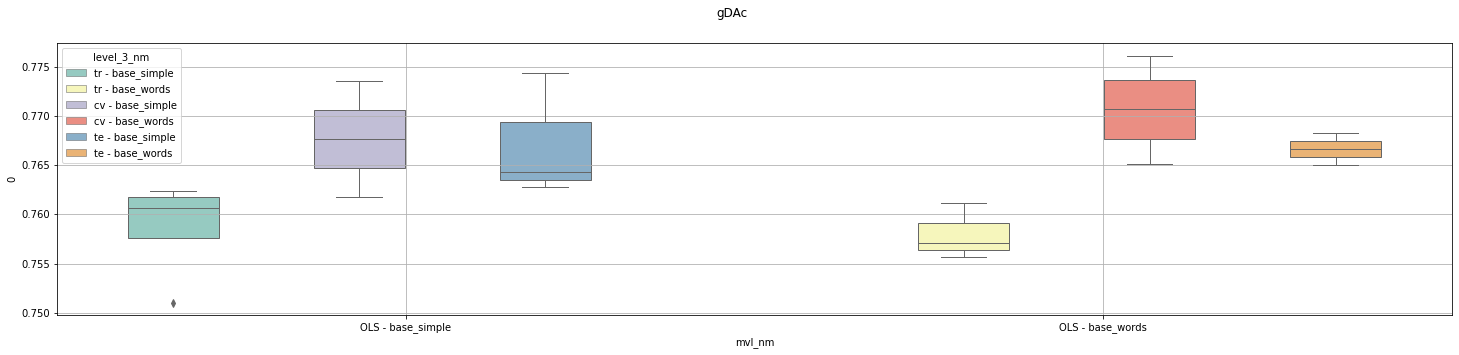

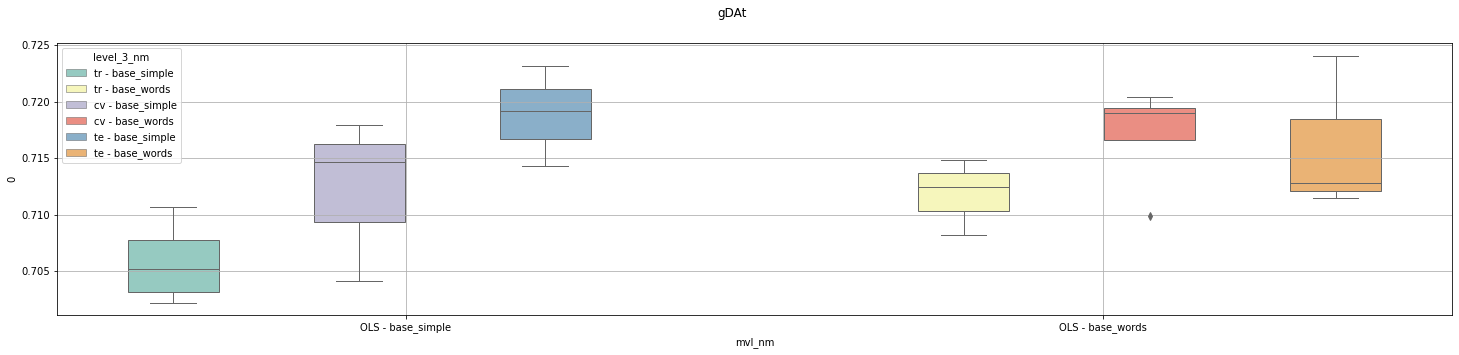

In [42]:
    # OUTPUT OPTION #2 - Separate plots by channel - combined names

    for chl in concat.reset_index()['channel'].unique():
        chl_concat = concat.query(f"channel == '{chl}'")
        fig, ax = plt.subplots(1,1,figsize=(25,5))
        
        fig.suptitle(f'{chl}')
        fig.set_facecolor('w')

#         for nm in chl_concat.reset_index()['name'].unique():
        chl_nm_concat = chl_concat.query(f"name == '{nm}'")


        vwyc = chl_nm_concat.loc[chl].values
        ymn, ymx = np.min(vwyc), np.max(vwyc)

        vbp = chl_nm_concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
        vbp['mvl'] = vbp['label']
    #     vbp['mvl'] = vbp['label'] + ' / ' + vbp['level_3']
    #     vbp['mvl'] = vbp['level_3'] + ' / ' + vbp['label']
        vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
        vbp = vbp.sort_values(['mvl', 'level_3'])

        vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
        vbp['mvl_nm'] = vbp['mvl'] + ' - ' + chl_concat.reset_index()['name']
        vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])
        vbp['level_3_nm'] = vbp['level_3'] + ' - ' + chl_concat.reset_index()['name']


        sns.boxplot(data=vbp, x='mvl_nm', y=0, hue='level_3_nm', palette="Set3", linewidth=1, ax=ax)
        ax.grid(True)
        plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'OLS - base_simple - gDAc'),
  Text(1, 0, 'OLS - base_words - gDAc'),
  Text(2, 0, 'OLS - base_simple - gDAt'),
  Text(3, 0, 'OLS - base_words - gDAt')])

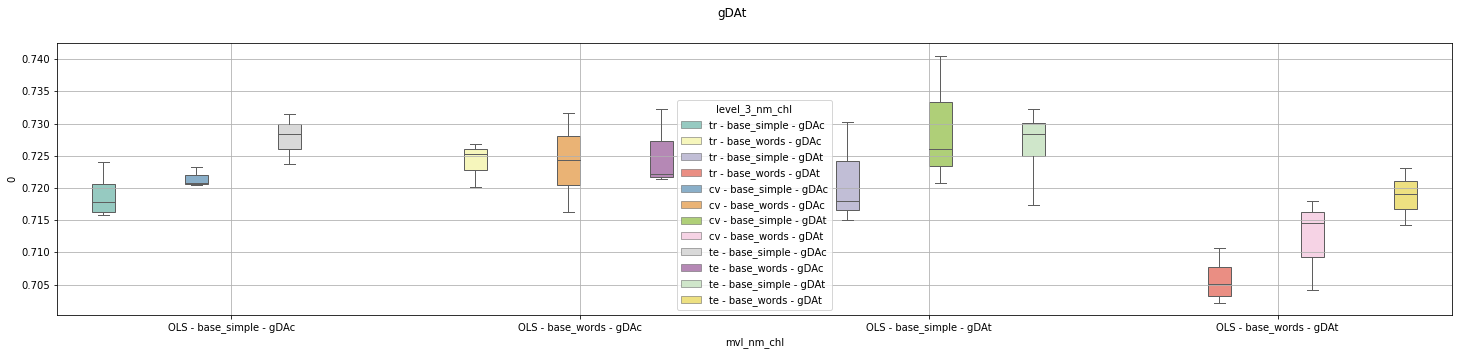

In [43]:
    # OUTPUT OPTION #3 - Combined plot for names + channels
    
    fig, ax = plt.subplots(1,1,figsize=(25,5))

    fig.suptitle(f'{chl}')
    fig.set_facecolor('w')

    vwyc = concat.loc[chl].values
    ymn, ymx = np.min(vwyc), np.max(vwyc)

    vbp = concat.loc[chl].rename({'mse_tr':'1_tr', 'mse_cv':'2_cv', 'mse_te':'3_te'}, axis=1).stack().reset_index()
    vbp['mvl'] = vbp['label']
    vbp['mvl'] = vbp['mvl'].str.replace('simple_', '')
    vbp = vbp.sort_values(['mvl', 'level_3'])

    vbp['mvl'] = vbp['mvl'].apply(lambda x: x.split('_')[-1])
    vbp['mvl_nm_chl'] = vbp['mvl'] + ' - ' + concat.reset_index()['name'] + ' - ' + concat.reset_index()['channel']
    vbp['level_3'] = vbp['level_3'].apply(lambda x: x.split('_')[-1])
    vbp['level_3_nm_chl'] = vbp['level_3'] + ' - ' + concat.reset_index()['name'] + ' - ' + concat.reset_index()['channel']


    sns.boxplot(data=vbp, x='mvl_nm_chl', y=0, hue='level_3_nm_chl', palette="Set3", linewidth=1, ax=ax)
    ax.grid(True)
    plt.xticks(rotation=0)

In [17]:
concat

mse_tr    mse_cv    mse_te
channel name        label run_num                              
gDAc    base_simple 1_OLS num=0    0.771453  0.780470  0.770986
                          num=1    0.761192  0.773133  0.781089
                          num=2    0.770379  0.771669  0.771868
                          num=3    0.770335  0.769394  0.772269
                          num=4    0.770385  0.773839  0.771768
                          num=5    0.766852  0.768285  0.775428
                          num=6    0.765124  0.768277  0.777747
                          num=7    0.770040  0.773317  0.772866
                          num=8    0.768469  0.773714  0.774092
                          num=9    0.766145  0.773290  0.776014
        base_words  1_OLS num=0    0.762362  0.773601  0.762765
                          num=1    0.751032  0.761828  0.774415
                          num=2    0.761606  0.767722  0.764327
                          num=3    0.759754  0.772901  0.766626
                          num=4    0.761176  0.776172  0.765000
                          num=5    0.757148  0.765139  0.768312
                          num=6    0.755660  0.768531  0.770945
                          num=7    0.757464  0.770312  0.768403
                          num=8    0.759104  0.762787  0.767073
                          num=9    0.755245  0.766356  0.769862
gDAt    base_simple 1_OLS num=0    0.724069  0.720481  0.723720
                          num=1    0.716329  0.720710  0.731533
                          num=2    0.719465  0.723318  0.728388
                          num=3    0.715841  0.716294  0.732341
                          num=4    0.725289  0.731717  0.722120
                          num=5    0.726902  0.726966  0.721330
                          num=6    0.720217  0.721847  0.727515
                          num=7    0.730227  0.740566  0.717367
                          num=8    0.718025  0.720747  0.729353
                          num=9    0.715050  0.726069  0.732229
        base_words  1_OLS num=0    0.710651  0.714628  0.714299
                          num=1    0.703520  0.704100  0.723114
                          num=2    0.706802  0.717937  0.719119
                          num=3    0.702210  0.720370  0.724066
                          num=4    0.712423  0.719134  0.712773
                          num=5    0.714849  0.718807  0.711454
                          num=6    0.708185  0.709860  0.718218
                          num=7    0.717539  0.714763  0.707426
                          num=8    0.706131  0.706796  0.719025
                          num=9    0.703004  0.713068  0.722012

In [15]:
vbp

,name,label,run_num,level_3,0,mvl
0,base_simple,1_OLS,num=0,tr,0.724069,OLS
3,base_simple,1_OLS,num=1,tr,0.716329,OLS
6,base_simple,1_OLS,num=2,tr,0.719465,OLS
9,base_simple,1_OLS,num=3,tr,0.715841,OLS
12,base_simple,1_OLS,num=4,tr,0.725289,OLS
15,base_simple,1_OLS,num=5,tr,0.726902,OLS
18,base_simple,1_OLS,num=6,tr,0.720217,OLS
21,base_simple,1_OLS,num=7,tr,0.730227,OLS
24,base_simple,1_OLS,num=8,tr,0.718025,OLS
27,base_simple,1_OLS,num=9,tr,0.715050,OLS
